In [ ]:
pip install contextily

In [6]:
pip install folium

In [ ]:
pip install xyzservices

In [52]:
pip install matplotlib-scalebar


In [2]:
import geopandas as gpd
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
import contextily as ctx

import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import contextily as ctx
from matplotlib.colors import Normalize
from matplotlib import font_manager
from matplotlib.lines import Line2D
import glob
import matplotlib.pylab as plt


C:\Users\agnes\anaconda3\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\agnes\AppData\Local\Temp\ipykernel_21896\377060711.py:1: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you ar

In [ ]:
import os
import glob
import geopandas as gpd
import pandas as pd

# Directory with the standardized files
folder = 'C:/Users/agnes/Documents/EAGLE/Innovative_Sensors/FinalMeasurements/MedianStandardized_withNA/'

# Find all .gpkg files ending with '_MedianStandardized_withNA.gpkg'
standardized_files = glob.glob(os.path.join(folder, '*_MedianStandardized_withNA.gpkg'))

# Initialize a list to store all data
all_data = []

# Load and concatenate data only from files that contain 'bottom' and 'back' columns
for file in standardized_files:
    gdf = gpd.read_file(file)
    columns = gdf.columns
    # print(columns)
    if any('particleBottom' in col for col in columns) and any('particleBack' in col for col in columns):
        all_data.append(gdf)

# Concatenate all relevant GeoDataFrames into one DataFrame
df = pd.concat(all_data, ignore_index=True)

# Filter to keep only relevant columns for particle sizes and positions
particle_columns = [col for col in df.columns if 'median_Particles' in col and ('air_particleFront' in col or 'air_particleBottom' in col or 'air_particleBack' in col)]
df_particles = df[particle_columns]

# Calculate the correlation matrix for particle columns
correlation_matrix = df_particles.corr()

# Print the correlation matrix
print("Correlation matrix:")
print(correlation_matrix)

# For visualization (optional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Particle Measurements by Sensor Position')
plt.show()


In [105]:
# Directory with the standardized files
folder = 'C:/Users/agnes/Documents/EAGLE/Innovative_Sensors/FinalMeasurements/MedianStandardized_withNA/'

# Find all .gpkg files ending with '_MedianStandardized_withNA.gpkg'
standardized_files = glob.glob(os.path.join(folder, '*_MedianStandardized_withNA.gpkg'))

# Initialize a list to store all data
all_data = []

# Load and concatenate data only from files that contain 'bottom' and 'back' columns
for file in standardized_files:
    gdf = gpd.read_file(file)
    columns = gdf.columns
    # print(columns)
    if any('particleBottom' in col for col in columns) and any('particleBack' in col for col in columns):
        all_data.append(gdf)

# Concatenate all relevant GeoDataFrames into one DataFrame
df = pd.concat(all_data, ignore_index=True)

# Filter to keep only relevant columns for particle sizes and positions
particle_columns = [col for col in df.columns if 'median_Particles' in col and ('air_particleFront' in col or 'air_particleBottom' in col or 'air_particleBack' in col)]
df_particles = df[particle_columns]

# Group columns by particle size
particle_groups = {}
for col in df_particles.columns:
    size = col.split('> ')[1].split('um')[0]
    if size not in particle_groups:
        particle_groups[size] = []
    particle_groups[size].append(col)

# Calculate mean absolute differences (MAD) and find the position with the highest deviation for each particle size
mad_results = {}

for size, columns in particle_groups.items():
    if len(columns) == 3:  # Ensure there are three positions: front, bottom, back
        front_col, bottom_col, back_col = columns
        
        mad_front = (df_particles[front_col] - df_particles[bottom_col]).abs().mean() + (df_particles[front_col] - df_particles[back_col]).abs().mean()
        mad_bottom = (df_particles[bottom_col] - df_particles[front_col]).abs().mean() + (df_particles[bottom_col] - df_particles[back_col]).abs().mean()
        mad_back = (df_particles[back_col] - df_particles[front_col]).abs().mean() + (df_particles[back_col] - df_particles[bottom_col]).abs().mean()
        
        mad_results[size] = {
            'front': mad_front,
            'bottom': mad_bottom,
            'back': mad_back
        }

# Determine which position has the highest deviation for each particle size
most_deviant_position = {size: max(mad, key=mad.get) for size, mad in mad_results.items()}

# Print results
print("Most deviant position by particle size:")
for size, position in most_deviant_position.items():
    print(f"Particle size > {size}um: {position}")
    
    
# Convert mad_results to a format suitable for plotting
plot_data = pd.concat(
    [df.assign(particle_size=size) for size, df in mad_results.items()],
    ignore_index=True
)

# Plotting
plt.figure(figsize=(12, 8))
for size in plot_data['particle_size'].unique():
    subset = plot_data[plot_data['particle_size'] == size]
    plt.plot(subset['distance_from_start_km'], subset['MAD'], marker='o', label=f'Particle size > {size}')

plt.xlabel('Distance from Start (km)')
plt.ylabel('Mean Absolute Difference (MAD)')
plt.title('MAD of Particle Measurements by Distance from Start')
plt.legend(title='Particle Size')
plt.grid(True)
plt.show()

Most deviant position by particle size:
Particle size > 0.3um: bottom
Particle size > 0.5um: bottom
Particle size > 1.0um: bottom
Particle size > 10.0um: back
Particle size > 2.5um: bottom
Particle size > 5.0um: bottom


AttributeError: 'dict' object has no attribute 'assign'

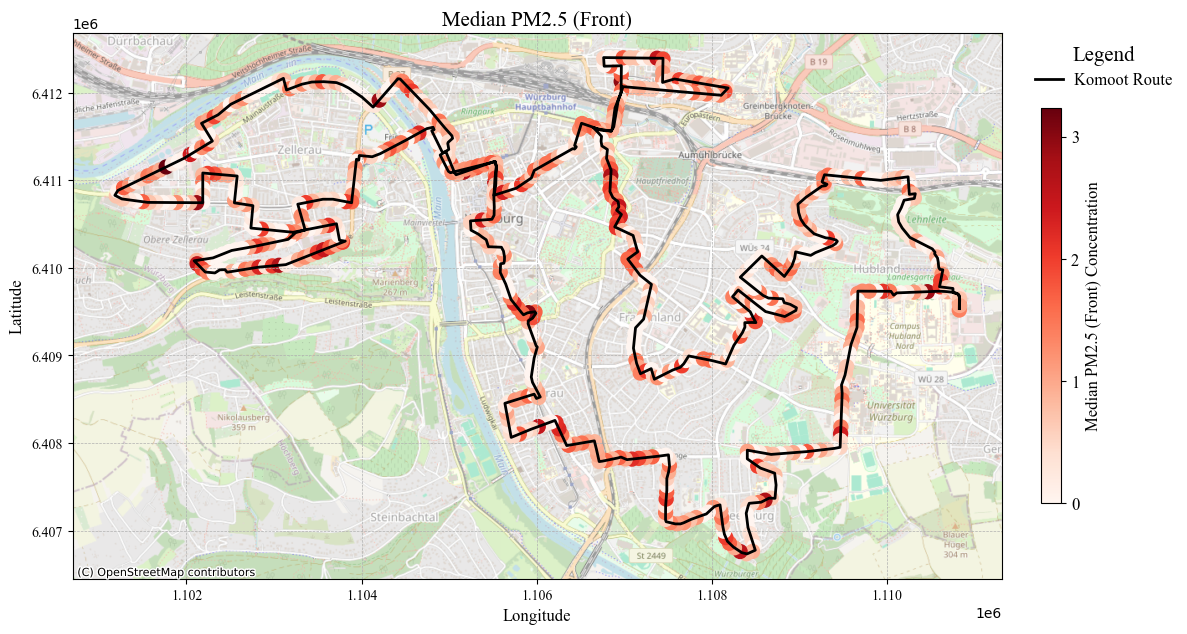

In [5]:
# #############################################################################################################
# This script generates a map for anlysing Spatial Variations and Hotspots of Particle Concentration:
#
# 1.
# #############################################################################################################

# File paths
median_pm_file = 'C:/Users/agnes/Documents/EAGLE/Innovative_Sensors/FinalMeasurements/median_PM.gpkg'
komoot_route_file = 'C:/Users/agnes/Documents/EAGLE/Innovative_Sensors/FinalMeasurements/komoot_route_projected_new_2.gpkg'

# Load GeoPackage files
gdf_median = gpd.read_file(median_pm_file)
gdf_route = gpd.read_file(komoot_route_file)

# Set font to Times New Roman
font_properties = font_manager.FontProperties(fname='C:/Windows/Fonts/times.ttf')

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Project to EPSG:3857 if not already
if gdf_median.crs.to_string() != 'EPSG:3857':
    gdf_median = gdf_median.to_crs(epsg=3857)

if gdf_route.crs.to_string() != 'EPSG:3857':
    gdf_route = gdf_route.to_crs(epsg=3857)

# Plot the Komoot route
gdf_route.plot(ax=ax, color='black', linewidth=2, label='Komoot Route')

# Plot the median PM points
cmap = 'Reds'
scatter = gdf_median.plot(ax=ax, column='median_Particles > 2.5um / 0.1L air_particleFront', cmap=cmap, markersize=100, legend=False)

# Add title and labels
ax.set_title('Median PM2.5 (Front)', fontproperties=font_properties, fontsize=15)
ax.set_xlabel('Longitude', fontproperties=font_properties, fontsize=12)
ax.set_ylabel('Latitude', fontproperties=font_properties, fontsize=12)

# Add background map with proper zoom level and transparency
ctx.add_basemap(ax, crs=gdf_median.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, zoom=14, alpha = 0.7)
# ctx.add_basemap(ax, crs=gdf_median.crs.to_string(), source=ctx.providers.CartoDB.PositronOnlyLabels, zoom=13, alpha = 0.7)

# Normalize and create a ScalarMappable for the color bar
norm = Normalize(vmin=gdf_median['median_Particles > 2.5um / 0.1L air_particleFront'].min(), vmax=gdf_median['median_Particles > 2.5um / 0.1L air_particleFront'].max())
sm = ScalarMappable(norm=norm, cmap=cmap)

# Add color bar (for continuous legend)
cbar = fig.colorbar(sm, ax=ax, fraction=0.02, pad=0.04)
cbar.set_label('Median PM2.5 (Front) Concentration', fontproperties=font_properties, fontsize=12)
cbar.set_ticks([0, 1, 2, 3])
cbar.set_ticklabels(['0', '1', '2', '3'], fontproperties=font_properties, fontsize=12)
cbar.ax.tick_params(labelsize=12)  # Adjust the font size of the ticks
cbar.ax.yaxis.set_tick_params(color='black', labelcolor='black')  # Ensure the tick labels are black

# Create custom legend for the route
route_legend = Line2D([0], [0], color='black', linewidth=2, label='Komoot Route')

# Add the custom legend
leg = ax.legend(handles=[route_legend], loc='upper left', bbox_to_anchor=(1.022, 1), title='Legend', prop=font_properties, frameon=False)

# Adjust legend title and text font size
leg.get_title().set_fontproperties(font_properties)
leg.get_title().set_fontsize(15)

for text in leg.get_texts():
    text.set_fontproperties(font_properties)
    text.set_fontsize(12)

# Customize the grid lines
ax.grid(True, linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', which='both', labelsize=12)

# Set the font properties for tick labels
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(font_properties)

# Adjust layout to accommodate legend
plt.tight_layout()

# Show plot
plt.show()


In [7]:
print(gdf_median['median_Particles > 10.0um / 0.1L air_particleFront'].min(), gdf_median['median_Particles > 2.5um / 0.1L air_particleFront'].max())



0.0 3.235294117647059


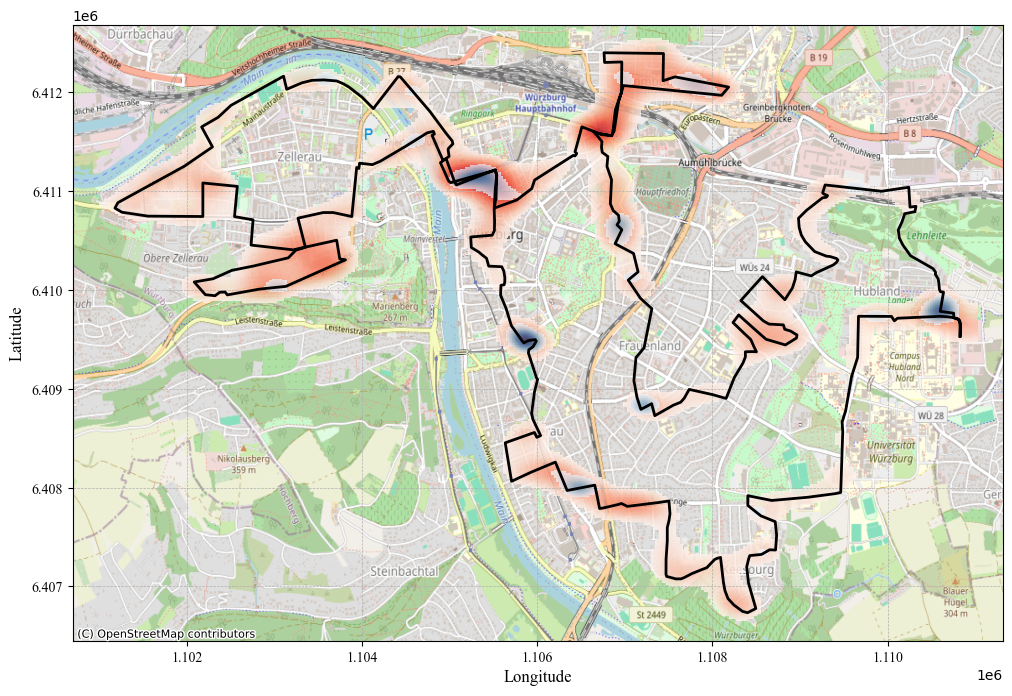

Map saved as C:/Users/agnes/Documents/EAGLE/Innovative_Sensors/FinalMeasurements/Plots/Heatmap.png


In [31]:
# #############################################################################################################
# This script generates a heatmap for anlysing Spatial Variations and Hotspots of Particle Concentration:
#
# 1.
# #############################################################################################################

# File paths
median_pm_file = 'C:/Users/agnes/Documents/EAGLE/Innovative_Sensors/FinalMeasurements/median_PM.gpkg'
komoot_route_file = 'C:/Users/agnes/Documents/EAGLE/Innovative_Sensors/FinalMeasurements/komoot_route_projected_new_2.gpkg'

# Load GeoPackage files
gdf_median = gpd.read_file(median_pm_file)
gdf_route = gpd.read_file(komoot_route_file)

# Set font to Times New Roman
font_properties = font_manager.FontProperties(fname='C:/Windows/Fonts/times.ttf')

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Project to EPSG:3857 if not already
if gdf_median.crs.to_string() != 'EPSG:3857':
    gdf_median = gdf_median.to_crs(epsg=3857)

if gdf_route.crs.to_string() != 'EPSG:3857':
    gdf_route = gdf_route.to_crs(epsg=3857)

# Plot the Komoot route
gdf_route.plot(ax=ax, color='black', linewidth=2, label='Komoot Route')

# Extract coordinates and the PM2.5 and PM10 data
x = gdf_median.geometry.x
y = gdf_median.geometry.y
z = gdf_median['median_Particles > 2.5um / 0.1L air_particleFront']
z10 = gdf_median['median_Particles > 10.0um / 0.1L air_particleFront']

# Define bin edges with a buffer
x_edges = np.linspace(x.min() - 200, x.max() + 200, 250)  # Extending the range with buffer
y_edges = np.linspace(y.min() - 200, y.max() + 200, 250)  # Extending the range with buffer


# Define bin edges with a buffer
x_edges10 = np.linspace(x.min() - 200, x.max() + 200, 350)  # Extending the range with buffer
y_edges10 = np.linspace(y.min() - 200, y.max() + 200, 350)  # Extending the range with buffer


# Create 2D histograms
heatmap, xedges, yedges = np.histogram2d(x, y, bins=[x_edges, y_edges], weights=z, density=False)
heatmap10, xedges, yedges = np.histogram2d(x, y, bins=[x_edges10, y_edges10], weights=z10, density=False)

# Apply Gaussian filter for stronger smoothing
heatmap = gaussian_filter(heatmap, sigma=5)
heatmap10 = gaussian_filter(heatmap10, sigma=5)

# Set all values below threshold to NaN
heatmap[heatmap < 0.02] = np.nan
heatmap10[heatmap10 < 0.01] = np.nan

# # Normalize the heatmaps for better visibility
# heatmap = np.log1p(np.clip(heatmap, a_min=0, a_max=None))
# heatmap10 = np.log1p(np.clip(heatmap10, a_min=0, a_max=None))

# Add background map with proper zoom level and transparency
ctx.add_basemap(ax, crs=gdf_median.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, zoom=14)

# Define extent with buffer
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

# Plot heatmaps
im = ax.imshow(heatmap.T, extent=extent, origin='lower', cmap='Reds', aspect='auto', alpha=0.8, norm=Normalize(vmin=np.nanmin(heatmap), vmax=np.nanmax(heatmap)))
im10 = ax.imshow(heatmap10.T, extent=extent, origin='lower', cmap='Blues', aspect='auto', alpha=0.7, norm=Normalize(vmin=np.nanmin(heatmap10), vmax=np.nanmax(heatmap10)))


# Create custom legend for the route
# route_legend = Line2D([0], [0], color='black', linewidth=2, label='Komoot Route')
# ax.legend(handles=[route_legend], loc='upper left', bbox_to_anchor=(1.02, 1), prop=font_properties, frameon=False)

# Add color bars for heatmaps
# # Create a new axes for the colorbars
# cbar_ax1 = fig.add_axes([0.93, 0.59, 0.02, 0.2])  # [left, bottom, width, height]
# cbar_ax2 = fig.add_axes([0.93, 0.35, 0.02, 0.2])   # [left, bottom, width, height]

# cbar1 = fig.colorbar(im, cax=cbar_ax1)
# cbar1.set_label('Log-Scaled PM2.5', fontproperties=font_properties, fontsize=12)
# cbar1.ax.tick_params(labelsize=12)
# cbar1.ax.yaxis.set_tick_params(color='black', labelcolor='black')

# cbar2 = fig.colorbar(im10, cax=cbar_ax2)
# cbar2.set_label('Log-Scaled PM10', fontproperties=font_properties, fontsize=12)
# cbar2.ax.tick_params(labelsize=12)
# cbar2.ax.yaxis.set_tick_params(color='black', labelcolor='black')

# Customize the grid lines
ax.grid(True, linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', which='both', labelsize=12)

# Set the font properties for tick labels
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(font_properties)

# Add title and labels
# ax.set_title('Heatmap of Median PM2.5 and PM10 (Front) Concentration', fontproperties=font_properties, fontsize=15)
ax.set_xlabel('Longitude', fontproperties=font_properties, fontsize=12)
ax.set_ylabel('Latitude', fontproperties=font_properties, fontsize=12)

# Show plot
plt.show()

# Save the plot as a PNG file
output_image_path = 'C:/Users/agnes/Documents/EAGLE/Innovative_Sensors/FinalMeasurements/Plots/Heatmap.png'
fig.savefig(output_image_path, dpi=300, bbox_inches='tight')

print(f"Map saved as {output_image_path}")


Threshold for PM2.5: 1.9993392557780063
Threshold for PM10: 1.0313171538218933
Number of points in top 20% PM2.5: 133
Number of points in top 20% PM10: 133


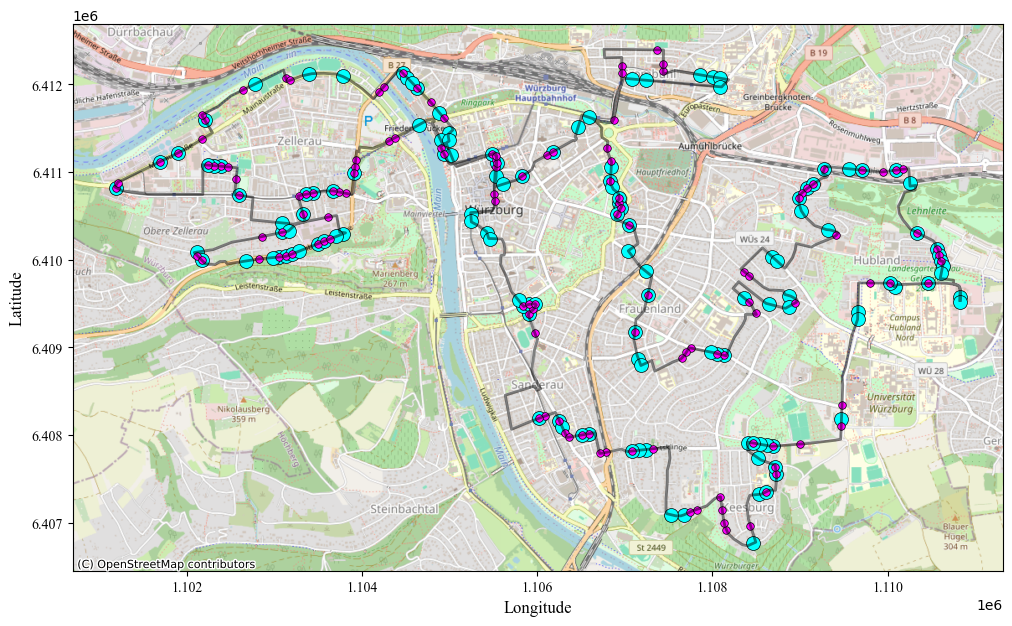

Map saved as C:/Users/agnes/Documents/EAGLE/Innovative_Sensors/FinalMeasurements/Plots/Variability.png


In [30]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import contextily as ctx

# File paths
folder_path = 'C:/Users/agnes/Documents/EAGLE/Innovative_Sensors/FinalMeasurements/MedianStandardized_withNA/'
file_pattern = folder_path + '*.gpkg'
files = glob.glob(file_pattern)
komoot_route_file = 'C:/Users/agnes/Documents/EAGLE/Innovative_Sensors/FinalMeasurements/komoot_route_projected_new_2.gpkg'

times_font_properties = font_manager.FontProperties(fname='C:/Windows/Fonts/times.ttf')

# Load GeoPackage files
gdfs = [gpd.read_file(file) for file in files]
gdf_route = gpd.read_file(komoot_route_file)

# Combine the data into a single GeoDataFrame and ensure it's in EPSG:3857
combined_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))
combined_gdf = combined_gdf.to_crs(epsg=3857)
gdf_route = gdf_route.to_crs(epsg=3857)

# Calculate mean and standard deviation of PM concentrations at each point
grouped = combined_gdf.groupby('geometry').agg({
    'median_Particles > 2.5um / 0.1L air_particleFront': ['mean', 'std'],
    'median_Particles > 10.0um / 0.1L air_particleFront': ['mean', 'std']
})

# Flatten the MultiIndex columns
grouped.columns = ['pm25_mean', 'pm25_std', 'pm10_mean', 'pm10_std']

# Reset index to turn the GeoDataFrame into a regular DataFrame
grouped = grouped.reset_index()
# print(grouped)
# Convert the DataFrame back to GeoDataFrame
grouped_gdf = gpd.GeoDataFrame(grouped, geometry='geometry')

# print(grouped_gdf.head())
# print(grouped_gdf['pm25_std'].describe())

import numpy as np

# Berechnung des 80. Perzentils für die Standardabweichungen von PM2.5
threshold_pm25 = np.percentile(grouped_gdf['pm25_std'].dropna(), 80)
print(f'Threshold for PM2.5: {threshold_pm25}')

# Berechnung des 80. Perzentils für die Standardabweichungen von PM10
threshold_pm10 = np.percentile(grouped_gdf['pm10_std'].dropna(), 80)
print(f'Threshold for PM10: {threshold_pm10}')

# Filtere die oberen 20% basierend auf dem Schwellenwert
top_20_pm25 = grouped_gdf[grouped_gdf['pm25_std'] >= threshold_pm25]
top_20_pm10 = grouped_gdf[grouped_gdf['pm10_std'] >= threshold_pm10]

# Überprüfe die Anzahl der gefilterten Punkte
print(f'Number of points in top 20% PM2.5: {len(top_20_pm25)}')
print(f'Number of points in top 20% PM10: {len(top_20_pm10)}')

import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from matplotlib_scalebar.scalebar import ScaleBar

# Erstelle den Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot der Komoot-Route
gdf_route.plot(ax=ax, color='black', linewidth=2, label='Komoot Route', alpha=0.5)

# Plot der PM10-Variabilität mit größeren Punkten
scatter_pm10 = ax.scatter(
    top_20_pm10.geometry.x, top_20_pm10.geometry.y, 
    c='cyan',  # Farbe für PM10
    s=100, alpha=1, edgecolor='k', linewidth=0.5, 
    label='Top 20% PM10 Variability'
)

# Plot der PM2.5-Variabilität
scatter_pm25 = ax.scatter(
    top_20_pm25.geometry.x, top_20_pm25.geometry.y, 
    c='magenta',  # Farbe für PM2.5
    s=30, alpha=1, edgecolor='k', linewidth=0.5, 
    label='Top 20% PM2.5 Variability'
)

# Hintergrundkarte hinzufügen
ctx.add_basemap(ax, crs=grouped_gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, zoom=14)

# Skalierbalken ohne Hintergrund hinzufügen
scalebar = ScaleBar(1, location='lower right', units='m', scale_loc='bottom', label_loc='bottom', 
                    font_properties={'size': 10, 'family': 'serif', 'weight': 'bold'}, 
                    box_color='none', box_alpha=0)
# ax.add_artist(scalebar)

# Set the font properties for tick labels
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(times_font_properties)
    
# Legende hinzufügen
# Add legend in the upper right corner
# ax.legend(loc='upper right', prop=times_font_properties, facecolor = "white",framealpha=1, title = "Legend", 
          # handletextpad=1, handlelength=1.0, borderpad=0.3, labelspacing=0.5, markerscale=0.8, fontsize = 20)

# Titel und Achsenbeschriftungen hinzufügen
# ax.set_title('Top 20% Variability of PM2.5 and PM10 Concentrations', fontsize=15, fontproperties=times_font_properties)
ax.set_xlabel('Longitude', fontsize=12, fontproperties=times_font_properties)
ax.set_ylabel('Latitude', fontsize=12, fontproperties=times_font_properties)

# Plot anzeigen
plt.show()

# Save the plot as a PNG file
output_image_path = 'C:/Users/agnes/Documents/EAGLE/Innovative_Sensors/FinalMeasurements/Plots/Variability.png'
fig.savefig(output_image_path, dpi=300, bbox_inches='tight')

print(f"Map saved as {output_image_path}")


TypeError: Text.set_fontproperties() got an unexpected keyword argument 'fontsize'

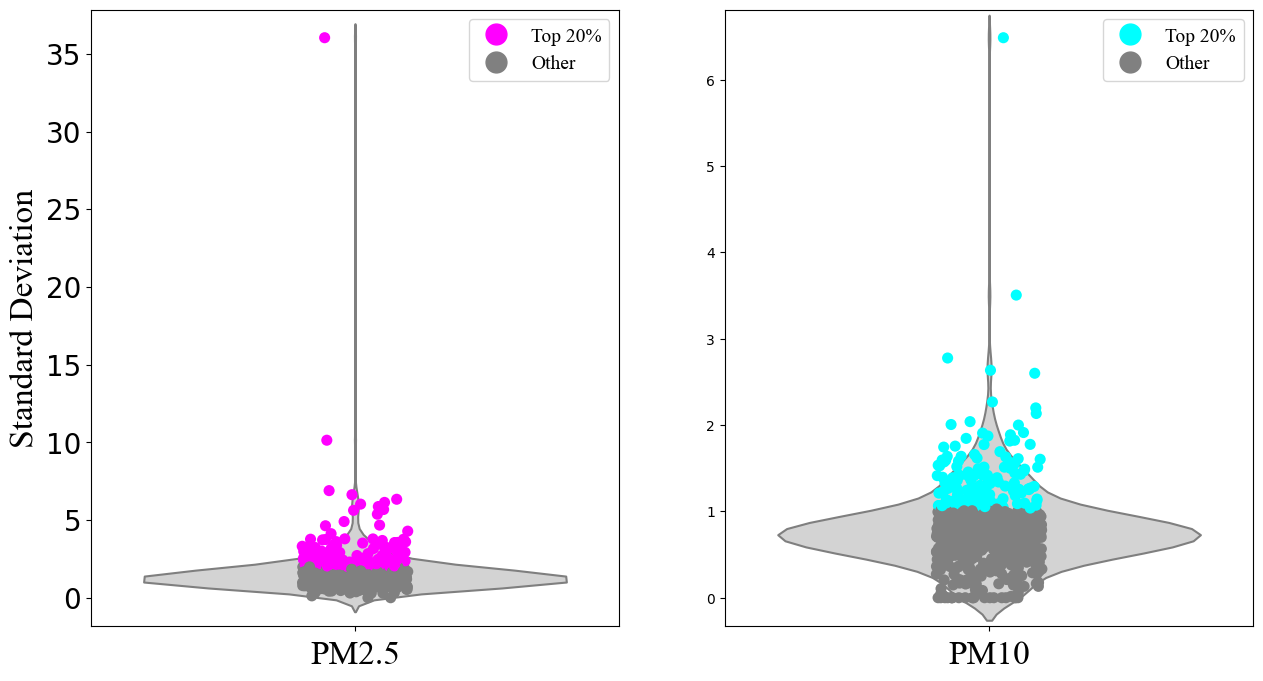

In [41]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import seaborn as sns
import contextily as ctx
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties

# Define font properties
times_font_properties = FontProperties(fname='C:/Windows/Fonts/times.ttf', size=14)

# File paths
folder_path = 'C:/Users/agnes/Documents/EAGLE/Innovative_Sensors/FinalMeasurements/MedianStandardized_withNA/'
file_pattern = folder_path + '*.gpkg'
files = glob.glob(file_pattern)
komoot_route_file = 'C:/Users/agnes/Documents/EAGLE/Innovative_Sensors/FinalMeasurements/komoot_route_projected_new_2.gpkg'

# Load GeoPackage files
gdfs = [gpd.read_file(file) for file in files]
gdf_route = gpd.read_file(komoot_route_file)

# Combine the data into a single GeoDataFrame and ensure it's in EPSG:3857
combined_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))
combined_gdf = combined_gdf.to_crs(epsg=3857)
gdf_route = gdf_route.to_crs(epsg=3857)

# Calculate mean and standard deviation of PM concentrations at each point
grouped = combined_gdf.groupby('geometry').agg({
    'median_Particles > 2.5um / 0.1L air_particleFront': ['mean', 'std'],
    'median_Particles > 10.0um / 0.1L air_particleFront': ['mean', 'std']
})

# Flatten the MultiIndex columns
grouped.columns = ['pm25_mean', 'pm25_std', 'pm10_mean', 'pm10_std']

# Reset index to turn the GeoDataFrame into a regular DataFrame
grouped = grouped.reset_index()
# Convert the DataFrame back to GeoDataFrame
grouped_gdf = gpd.GeoDataFrame(grouped, geometry='geometry')

# Calculate the 80th percentile for the standard deviations of PM2.5 and PM10
threshold_pm25 = np.percentile(grouped_gdf['pm25_std'].dropna(), 80)
threshold_pm10 = np.percentile(grouped_gdf['pm10_std'].dropna(), 80)

# Create a column indicating whether each point is in the top 20% for PM2.5 and PM10
grouped_gdf['top_20_pm25'] = grouped_gdf['pm25_std'] >= threshold_pm25
grouped_gdf['top_20_pm10'] = grouped_gdf['pm10_std'] >= threshold_pm10

# Create the plot
fig, ax = plt.subplots(1, 2, figsize=(15, 8))  # Adjusted figure size

# PM2.5 Violin Plot
sns.violinplot(y=grouped_gdf['pm25_std'], ax=ax[0], inner=None, color="lightgrey")
sns.stripplot(y=grouped_gdf['pm25_std'], ax=ax[0], hue=grouped_gdf['top_20_pm25'], palette={True: 'magenta', False: 'grey'}, size=8, jitter=True)
# ax[0].set_title('Standard Deviation of PM2.5', fontsize=14, fontproperties=times_font_properties)
ax[0].set_ylabel('Standard Deviation', fontsize=24, fontproperties=times_font_properties)
ax[0].set_xlabel('PM2.5', fontsize=24, fontproperties=times_font_properties)

# PM10 Violin Plot
sns.violinplot(y=grouped_gdf['pm10_std'], ax=ax[1], inner=None, color="lightgrey")
sns.stripplot(y=grouped_gdf['pm10_std'], ax=ax[1], hue=grouped_gdf['top_20_pm10'], palette={True: 'cyan', False: 'grey'}, size=8, jitter=True)
# ax[1].set_title('Standard Deviation of PM10', fontsize=14, fontproperties=times_font_properties)
ax[1].set_ylabel('', fontsize=24, fontproperties=times_font_properties)
ax[1].set_xlabel('PM10', fontsize=24, fontproperties=times_font_properties)

# Add legends
handles_pm25 = [mlines.Line2D([], [], color='magenta', marker='o', linestyle='None', markersize=15, label='Top 20%'),
                mlines.Line2D([], [], color='grey', marker='o', linestyle='None', markersize=15, label='Other')]
handles_pm10 = [mlines.Line2D([], [], color='cyan', marker='o', linestyle='None', markersize=15, label='Top 20%'),
                mlines.Line2D([], [], color='grey', marker='o', linestyle='None', markersize=15, label='Other')]

ax[0].legend(handles=handles_pm25, loc='upper right', fontsize=10, prop=times_font_properties)
ax[1].legend(handles=handles_pm10, loc='upper right', fontsize=10, prop=times_font_properties)

# Adjust tick parameters
for axis in ax:
    axis.tick_params(axis='both', labelsize=20)  # Set size of x and y axis labels
    # Set the font properties for the ticks
    for tick in axis.get_xticklabels():
        tick.set_fontproperties(times_font_properties)
    for tick in axis.get_yticklabels():
        tick.set_fontproperties(times_font_properties)

# Show plot
plt.tight_layout()
plt.show()


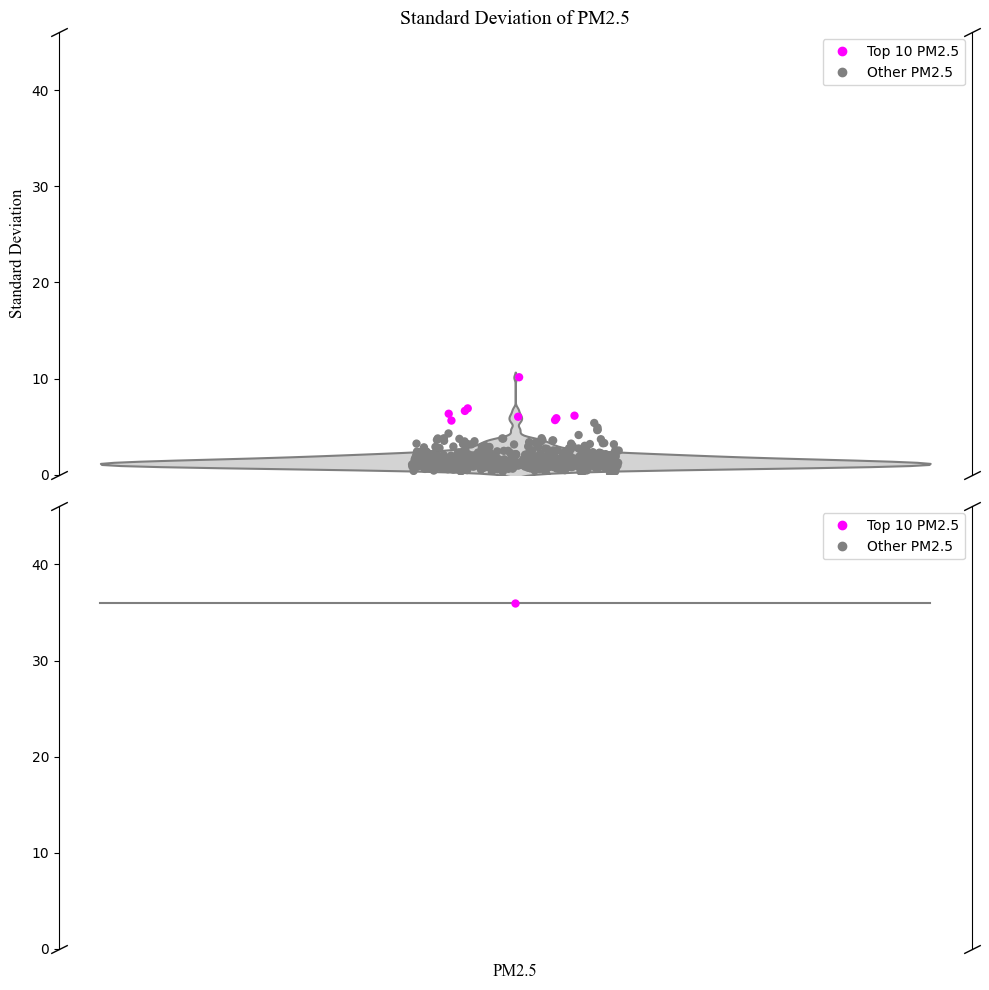

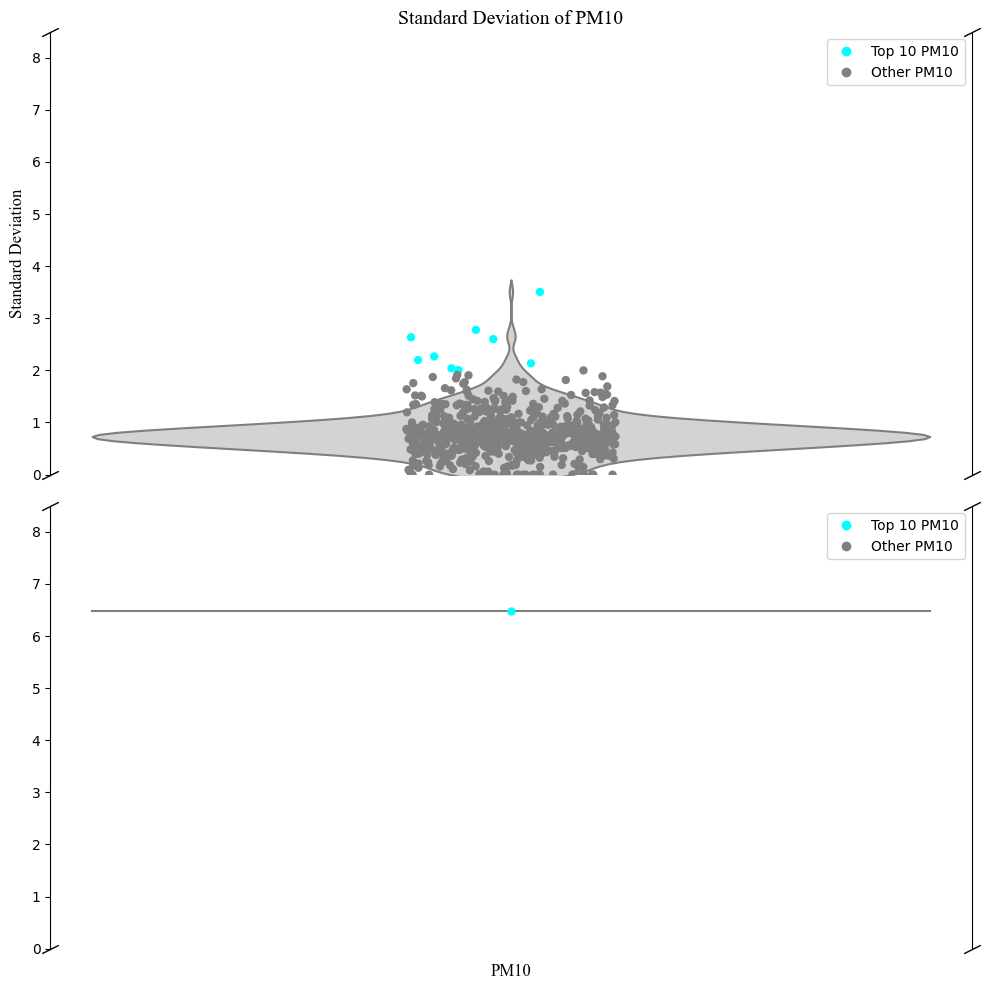

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.font_manager as fm
import glob
import geopandas as gpd

# File paths
folder_path = 'C:/Users/agnes/Documents/EAGLE/Innovative_Sensors/FinalMeasurements/MedianStandardized_withNA/'
file_pattern = folder_path + '*.gpkg'
files = glob.glob(file_pattern)
komoot_route_file = 'C:/Users/agnes/Documents/EAGLE/Innovative_Sensors/FinalMeasurements/komoot_route_projected_new_2.gpkg'

# Load GeoPackage files
gdfs = [gpd.read_file(file) for file in files]
gdf_route = gpd.read_file(komoot_route_file)

# Combine the data into a single GeoDataFrame and ensure it's in EPSG:3857
combined_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))
combined_gdf = combined_gdf.to_crs(epsg=3857)
gdf_route = gdf_route.to_crs(epsg=3857)

# Calculate the standard deviation of PM concentrations at each point
grouped = combined_gdf.groupby(['geometry'])
std_pm25 = grouped['median_Particles > 2.5um / 0.1L air_particleFront'].std()
std_pm10 = grouped['median_Particles > 10.0um / 0.1L air_particleFront'].std()

# Remove NaN values
std_pm25 = std_pm25.dropna()
std_pm10 = std_pm10.dropna()

# Extract the top 10 values
top_10_pm25 = std_pm25.nlargest(10)
top_10_pm10 = std_pm10.nlargest(10)

# Prepare the data for plotting
data = pd.DataFrame({
    'std_pm25': std_pm25,
    'std_pm10': std_pm10
}).reset_index(drop=True)

# Create a 'Top 10' column for highlighting
data['top_10_pm25'] = data['std_pm25'].isin(top_10_pm25)
data['top_10_pm10'] = data['std_pm10'].isin(top_10_pm10)

# Set font to Times New Roman
font_properties = fm.FontProperties(fname='C:/Windows/Fonts/times.ttf')

# Create the plot with broken Y-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
fig.subplots_adjust(hspace=0.1)  # adjust space between Axes

# Define the break lines
def add_break(ax, break_point, upper_limit):
    d = .5  # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
                  linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax.plot([0, 1], [0, 0], transform=ax.transAxes, **kwargs)
    ax.plot([0, 1], [1, 1], transform=ax.transAxes, **kwargs)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('none')
    ax.set_ylim(0, upper_limit)  # Set the limit for the lower plot

# PM2.5 Plot
sns.violinplot(y=data['std_pm25'][data['std_pm25'] <= 15], ax=ax1, inner=None, color="lightgrey")
sns.stripplot(y=data['std_pm25'][data['std_pm25'] <= 15], ax=ax1, hue=data['top_10_pm25'], palette={True: 'magenta', False: 'grey'}, size=6, jitter=True)
ax1.set_ylim(0, 15)
ax1.set_title('Standard Deviation of PM2.5', fontproperties=font_properties, fontsize=14)
ax1.set_ylabel('Standard Deviation', fontproperties=font_properties, fontsize=12)
ax1.set_xlabel('PM2.5', fontproperties=font_properties, fontsize=12)

# Add break lines for PM2.5
add_break(ax1, 15, data['std_pm25'].max() + 10)

# Upper range for PM2.5
sns.violinplot(y=data['std_pm25'][data['std_pm25'] > 15], ax=ax2, inner=None, color="lightgrey")
sns.stripplot(y=data['std_pm25'][data['std_pm25'] > 15], ax=ax2, hue=data['top_10_pm25'], palette={True: 'magenta', False: 'grey'}, size=6, jitter=True)
ax2.set_ylim(15 + 10, data['std_pm25'].max() + 10)  # Adjust as needed
ax2.set_ylabel('')
ax2.set_xlabel('PM2.5', fontproperties=font_properties, fontsize=12)

# Add break lines for PM2.5
add_break(ax2, 15, data['std_pm25'].max() + 10)

# Add legends
handles_pm25 = [mlines.Line2D([], [], color='magenta', marker='o', linestyle='None', markersize=6, label='Top 10 PM2.5'),
                mlines.Line2D([], [], color='grey', marker='o', linestyle='None', markersize=6, label='Other PM2.5')]
ax1.legend(handles=handles_pm25, loc='upper right', fontsize=10)
ax2.legend(handles=handles_pm25, loc='upper right', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()

# Repeat for PM10
fig, (ax3, ax4) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
fig.subplots_adjust(hspace=0.1)  # adjust space between Axes

# PM10 Plot
sns.violinplot(y=data['std_pm10'][data['std_pm10'] <= 4], ax=ax3, inner=None, color="lightgrey")
sns.stripplot(y=data['std_pm10'][data['std_pm10'] <= 4], ax=ax3, hue=data['top_10_pm10'], palette={True: 'cyan', False: 'grey'}, size=6, jitter=True)
ax3.set_ylim(0, 4)
ax3.set_title('Standard Deviation of PM10', fontproperties=font_properties, fontsize=14)
ax3.set_ylabel('Standard Deviation', fontproperties=font_properties, fontsize=12)
ax3.set_xlabel('PM10', fontproperties=font_properties, fontsize=12)

# Add break lines for PM10
add_break(ax3, 4, data['std_pm10'].max() + 2)

# Upper range for PM10
sns.violinplot(y=data['std_pm10'][data['std_pm10'] > 4], ax=ax4, inner=None, color="lightgrey")
sns.stripplot(y=data['std_pm10'][data['std_pm10'] > 4], ax=ax4, hue=data['top_10_pm10'], palette={True: 'cyan', False: 'grey'}, size=6, jitter=True)
ax4.set_ylim(4 + 2, data['std_pm10'].max() + 2)  # Adjust as needed
ax4.set_ylabel('')
ax4.set_xlabel('PM10', fontproperties=font_properties, fontsize=12)

# Add break lines for PM10
add_break(ax4, 4, data['std_pm10'].max() + 2)

# Add legends
handles_pm10 = [mlines.Line2D([], [], color='cyan', marker='o', linestyle='None', markersize=6, label='Top 10 PM10'),
                mlines.Line2D([], [], color='grey', marker='o', linestyle='None', markersize=6, label='Other PM10')]
ax3.legend(handles=handles_pm10, loc='upper right', fontsize=10)
ax4.legend(handles=handles_pm10, loc='upper right', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


In [25]:
import geopandas as gpd
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import glob

# File paths
folder_path = 'C:/Users/agnes/Documents/EAGLE/Innovative_Sensors/FinalMeasurements/MedianStandardized_withNA/'
file_pattern = folder_path + '*.gpkg'
files = glob.glob(file_pattern)

# Function to determine the time period from the filename
def determine_time_period(filename):
    if '11062024_VM' in filename or '13062024_Morgen' in filename or '20062024_Vormittag' in filename:
        return 'morning'
    elif 'Mittag' in filename:
        return 'midday'
    elif '13062024_nachmittag' in filename or '17062024_Abend' in filename or '19062024_Nachmittag' in filename:
        return 'afternoon'
    elif 'Abend' in filename or 'Daemmerung' in filename:
        return 'evening'
    else:
        return 'unknown'

# Load GeoPackage files and add the time period column
gdfs = []
for file in files:
    gdf = gpd.read_file(file)
    gdf['time_period'] = determine_time_period(file)
    gdfs.append(gdf)

# Combine the data into a single GeoDataFrame and ensure it's in EPSG:3857
combined_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))
combined_gdf = combined_gdf.to_crs(epsg=3857)

# Calculate mean and standard deviation of PM concentrations at each point
grouped = combined_gdf.groupby(['geometry', 'time_period']).agg({
    'median_Particles > 2.5um / 0.1L air_particleFront': ['mean', 'std'],
    'median_Particles > 10.0um / 0.1L air_particleFront': ['mean', 'std']
})

# Flatten the MultiIndex columns
grouped.columns = ['pm25_mean', 'pm25_std', 'pm10_mean', 'pm10_std']

# Reset index to turn the GeoDataFrame into a regular DataFrame
grouped = grouped.reset_index()

# Perform t-tests between different time periods
def perform_ttest(grouped, col):
    periods = grouped['time_period'].unique()
    results = {}
    for i in range(len(periods)):
        for j in range(i + 1, len(periods)):
            period1 = periods[i]
            period2 = periods[j]
            data1 = grouped[grouped['time_period'] == period1][col]
            data2 = grouped[grouped['time_period'] == period2][col]
            t_stat, p_val = ttest_ind(data1, data2, nan_policy='omit')
            results[f'{period1} vs {period2}'] = (t_stat, p_val)
    return results

# Perform t-tests for PM2.5 and PM10 standard deviations
pm25_ttest_results = perform_ttest(grouped, 'pm25_std')
pm10_ttest_results = perform_ttest(grouped, 'pm10_std')

# Print the results
print("PM2.5 Standard Deviation T-test Results:")
for comparison, (t_stat, p_val) in pm25_ttest_results.items():
    print(f"{comparison}: t-stat = {t_stat:.2f}, p-value = {p_val:.4f}")

print("\nPM10 Standard Deviation T-test Results:")
for comparison, (t_stat, p_val) in pm10_ttest_results.items():
    print(f"{comparison}: t-stat = {t_stat:.2f}, p-value = {p_val:.4f}")


PM2.5 Standard Deviation T-test Results:
afternoon vs evening: t-stat = -0.98, p-value = 0.3253
afternoon vs midday: t-stat = -0.98, p-value = 0.3289
afternoon vs morning: t-stat = -3.21, p-value = 0.0013
evening vs midday: t-stat = 0.07, p-value = 0.9434
evening vs morning: t-stat = -3.28, p-value = 0.0011
midday vs morning: t-stat = -3.52, p-value = 0.0005

PM10 Standard Deviation T-test Results:
afternoon vs evening: t-stat = -2.44, p-value = 0.0149
afternoon vs midday: t-stat = -2.81, p-value = 0.0050
afternoon vs morning: t-stat = -7.84, p-value = 0.0000
evening vs midday: t-stat = -0.49, p-value = 0.6215
evening vs morning: t-stat = -5.06, p-value = 0.0000
midday vs morning: t-stat = -4.24, p-value = 0.0000


In [ ]:
# #############################################################################################################
# This script generates histograms for particle measurement data by performing the following steps:
#
# 1. Locate all .gpkg files ending with '_standardized_withNA.gpkg' in a specified directory.
# 2. Load these GeoPackage files into GeoDataFrames and combine them into a single DataFrame.
# 3. Create an output folder for the histograms.
# 4. Define the particle sizes to be considered for histogram creation.
# 5. For each particle size, generate histograms for measurements at the 'Front', 'Back', and 'Bottom' positions.
# 6. Display the histogram plot for review before saving.
# 7. (Optional) Save the histogram plot as a PNG file.
# #############################################################################################################


folder = 'C:/Users/agnes/Documents/EAGLE/Innovative_Sensors/FinalMeasurements/standardized_withNA/'

# Find all .gpkg files ending with '_standardized_withNA.gpkg'
standardized_files = glob.glob(os.path.join(folder, '*_standardized_withNA.gpkg'))

# List for DataFrames
dfs = []

# Iterate over each standardized file and load DataFrame into the list
for file in standardized_files:
    df = gpd.read_file(file)
    dfs.append(df)

# Combine all DataFrames
combined_df = pd.concat(dfs)

# Create the output folder for the histograms
output_folder = 'C:/Users/agnes/Documents/EAGLE/Innovative_Sensors/FinalMeasurements/Plots'
os.makedirs(output_folder, exist_ok=True)

# List of particle sizes to be considered
particle_sizes = [
    'Particles > 0.3um / 0.1L air', 
    'Particles > 0.5um / 0.1L air',
    'Particles > 1.0um / 0.1L air',
    'Particles > 2.5um / 0.1L air',
    'Particles > 5.0um / 0.1L air',
    'Particles > 10.0um / 0.1L air'
]

# Function to clean column names for filenames
def clean_filename(name):
    return name.replace(' ', '_').replace('>', 'gt').replace('<', 'lt').replace('/', 'per')

# Iterate over each particle size
for particle_size in particle_sizes:
    # Create a new plot for each particle size
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create column names for the current particle size and position
    column_front = f'mean_{particle_size}_particleFront'
    column_back = f'mean_{particle_size}_particleBack'
    column_bottom = f'mean_{particle_size}_particleBottom'

    # Plot histograms
    bins = np.linspace(0, combined_df[[column_front, column_back, column_bottom]].max().max(), 30)
    
    # Calculate histogram data for Front, Back, and Bottom
    hist_front, _ = np.histogram(combined_df[column_front].dropna(), bins=bins)
    hist_back, _ = np.histogram(combined_df[column_back].dropna(), bins=bins)
    hist_bottom, _ = np.histogram(combined_df[column_bottom].dropna(), bins=bins)

    width = (bins[1] - bins[0]) / 4  # Width of the bars

    # Plot bars
    ax.bar(bins[:-1] - width, hist_front, width=width, label='Front', color='blue', align='center')
    ax.bar(bins[:-1], hist_back, width=width, label='Back', color='red', align='center')
    ax.bar(bins[:-1] + width, hist_bottom, width=width, label='Bottom', color='green', align='center')

    # Add title and labels
    ax.set_title(f'Histogram for {particle_size}')
    ax.set_xlabel('Concentration')
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True)

    # Show the plot before saving
    # plt.show()

    # Save the plot
    # output_filename = f'{clean_filename(particle_size)}_histogram.png'
    # output_path = os.path.join(output_folder, output_filename)
    # plt.savefig(output_path)

    plt.close()
    # print(f"Histogram for {particle_size} created and saved: {output_filename}")

print("All histograms have been created and saved.")


In [ ]:
# #############################################################################################################
# This script generates time series plots for particle measurement data by performing the following steps:
#
# 1. Locate all .gpkg files ending with '_standardized_withNA.gpkg' in a specified directory.
# 2. Define the particle sizes to be considered for time series plot creation.
# 3. Iterate over each file in the directory:
#    - Load the GeoPackage file into a GeoDataFrame.
#    - Extract the base file name for use in the output folder structure.
#    - Create an output folder for the time series plots for each file.
#    - For each particle size, generate time series plots for measurements at the 'Front', 'Back', and 'Bottom' positions.
#    - Save each plot as a PNG file in the respective output folder.
# 4. Print the status of each plot created and saved.
# #############################################################################################################

# Directory with the standardized files
folder = 'C:/Users/agnes/Documents/EAGLE/Innovative_Sensors/FinalMeasurements/standardized_withNA/'

# Find all .gpkg files ending with '_standardized_withNA.gpkg'
standardized_files = glob.glob(os.path.join(folder, '*_standardized_withNA.gpkg'))

# List of particle sizes to be considered
particle_sizes = [
    'Particles > 0.3um / 0.1L air', 
    'Particles > 0.5um / 0.1L air',
    'Particles > 1.0um / 0.1L air',
    'Particles > 2.5um / 0.1L air',
    'Particles > 5.0um / 0.1L air',
    'Particles > 10.0um / 0.1L air'
]

# Function to clean column names for filenames
def clean_filename(name):
    return name.replace(' ', '_').replace('>', 'gt').replace('<', 'lt').replace('/', 'per')

# Iterate over each file in the directory
for file in standardized_files:
    df = gpd.read_file(file)
    
    # Extract the base file name without path and extension
    file_name = os.path.splitext(os.path.basename(file))[0]
    
    # Remove the suffix '_standardized_withNA' from the file name
    base_file_name = file_name.replace('_standardized_withNA', '')
    
    # Create the output folder for the time series plots for this file
    output_folder = os.path.join('C:/Users/agnes/Documents/EAGLE/Innovative_Sensors/FinalMeasurements/Plots', base_file_name)
    os.makedirs(output_folder, exist_ok=True)
    
    # Iterate over each particle size
    for particle_size in particle_sizes:
        # Create a new plot for each particle size
        fig, ax = plt.subplots(figsize=(10, 6))

        # Create column names for the current particle size and position
        column_front = f'mean_{particle_size}_particleFront'
        column_back = f'mean_{particle_size}_particleBack'
        column_bottom = f'mean_{particle_size}_particleBottom'

        # Plot the time series for ParticleFront, ParticleBack, and ParticleBottom without points
        if column_front in df.columns:
            ax.plot(df['distance_from_start_km'], df[column_front], label='Particle Front')
        if column_back in df.columns:
            ax.plot(df['distance_from_start_km'], df[column_back], label='Particle Back')
        if column_bottom in df.columns:
            ax.plot(df['distance_from_start_km'], df[column_bottom], label='Particle Bottom')

        # Add title and labels
        ax.set_title(f'Time Series for {particle_size}')
        ax.set_xlabel('Distance from Start (km)')
        ax.set_ylabel('Mean Concentration')
        ax.legend()
        ax.grid(True)

        # Save the plot
        output_filename = f'{clean_filename(particle_size)}_time_series.png'
        output_path = os.path.join(output_folder, output_filename)
        plt.savefig(output_path)

        plt.close()
        print(f"Time series plot for {particle_size} in file {base_file_name} created and saved: {output_filename}")

print("All time series plots have been created and saved.")
